# SPLEX-Project 2020-2021 : Frog Calls 
-------
## 🐸 Step 3 : Representation of the best results 🐸
#### *Adrien Leroy and Antoine Auvergne*

In [11]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.model_selection import train_test_split

#### Key variables

In [12]:
dataset=pd.read_csv('../Anuran_Calls/Frogs_MFCCs.csv')
features=dataset.columns[1:-4]
labels=dataset.columns[-4:]
family,genus,species,id=labels

### 1. See the Boundaries of the SVM 🥔

#### Gather the Reults

In [19]:
x_train, x_test, y_train, y_test = train_test_split(dataset[features].values, 
                                                    dataset[labels], 
                                                    test_size=0.33, 
                                                    random_state=42)

SVMclfGeneral=SVC()
SVMclfGeneral.fit(x_train,y_train[family])


SVMclfFamiliesSVM=[]
SVMclFamiliesLabels=[]

SVMclfGenusSVM=[]
SVMclfGenusLabels=[]


for label in np.unique(dataset[family]):
    
    if len(np.unique(y_train[y_train[family]==label][genus]))>1:
        SVMclfTemp = SVC()
        SVMclfTemp.fit(x_train[y_train[family]==label],(y_train[y_train[family]==label][genus]))

        SVMclFamiliesLabels.append(label)
        SVMclfFamiliesSVM.append(SVMclfTemp)
    else:
        genusTemp=np.unique(y_train[y_train[family]==label][genus])[0]
        SVMclFamiliesLabels.append(label)
        SVMclfFamiliesSVM.append(genusTemp)
    
SVMclfFamilies=dict(zip(SVMclFamiliesLabels,SVMclfFamiliesSVM))

for label in np.unique(dataset[genus]):

    if len(np.unique(y_train[y_train[genus]==label][species]))>1:

        SVMclfTemp = SVC()
        SVMclfTemp.fit(x_train[y_train[genus]==label],(y_train[y_train[genus]==label][species]))
        SVMclfGenusLabels.append(label)
        SVMclfGenusSVM.append(SVMclfTemp)
    else:
        
        specieTemp=np.unique(y_train[y_train[genus]==label][species])[0]
        
        SVMclfGenusLabels.append(label)
        SVMclfGenusSVM.append(specieTemp)

        
SVMclfGenus=dict(zip(SVMclfGenusLabels,SVMclfGenusSVM))


y_predicted=pd.DataFrame(columns=y_test.columns[:-1])

y_predicted[family]=SVMclfGeneral.predict(x_test)

for label in np.unique(y_predicted[family]):
    
    x_testTemp=x_test[y_predicted[family]==label]
    x_testTempIndices=np.where(y_predicted[family]==label)[0]
    
    
    if type(SVMclfFamilies[label])!=str:
        
        y_predictedGenusTemp=SVMclfFamilies[label].predict(x_testTemp)
        y_predicted[genus].iloc[x_testTempIndices]=y_predictedGenusTemp
        
    else:

        y_predictedGenusTemp=[SVMclfFamilies[label] for i in x_testTempIndices]
        y_predicted[genus].iloc[x_testTempIndices]=y_predictedGenusTemp
        
for sublabel in np.unique(y_predicted[genus]):

    x_testTemp=x_test[y_predicted[genus]==sublabel]
    x_testTempIndices=np.where(y_predicted[genus]==sublabel)[0]

    if type(SVMclfGenus[sublabel])!=str:

        y_predictedSpecieTemp=SVMclfGenus[sublabel].predict(x_testTemp)
        y_predicted[species].iloc[x_testTempIndices]=y_predictedSpecieTemp

    else:

        y_predictedSpecieTemp=[SVMclfGenus[sublabel] for i in x_testTempIndices]
        y_predicted[species].iloc[x_testTempIndices]=y_predictedSpecieTemp

#### Plot results

UMAP(dens_frac=0.0, dens_lambda=0.0, verbose=True)
Construct fuzzy simplicial set
Tue Feb  2 20:12:34 2021 Finding Nearest Neighbors
Tue Feb  2 20:12:34 2021 Finished Nearest Neighbor Search
Tue Feb  2 20:12:34 2021 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Tue Feb  2 20:12:37 2021 Finished embedding


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 3340    AdenomeraHylaedactylus
5108      HypsiboasCinerascens
6524         HypsiboasCordobae
3649    AdenomeraHylaedactylus
1617    AdenomeraHylaedactylus
                 ...          
7016         Rhinellagranulosa
3682    AdenomeraHylaedactylus
3887    AdenomeraHylaedactylus
6433         HypsiboasCordobae
5235      HypsiboasCinerascens
Name: Species, Length: 2375, dtype: object

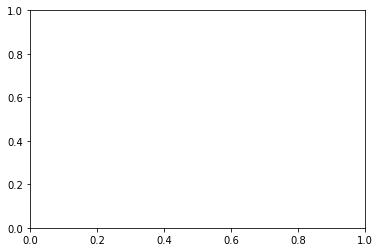

In [22]:
le = preprocessing.LabelEncoder()
le.fit(np.unique(y_test[species]))
reducer = umap.UMAP(min_dist=0.1, n_components=2, n_neighbors=15, verbose=True)
reducer.fit(x_test)
embedding = reducer.transform(x_test)

plt.scatter(embedding[:, 0], embedding[:, 1], c=y_test[species], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);